In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams


Leer los datos 


In [2]:
data = pd.read_csv('Diabetes.csv')

Ver los datos 


In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Descripción rápida

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Información sobre cada columna

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

En algunas columnas se observó que había bastantes ceros

In [7]:
ceros = (data == 0).sum()
print(ceros)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [8]:
ceros_outcome_1 = (data.loc[data['Outcome'] == 1] == 0).sum()
print(ceros_outcome_1)

Pregnancies                  38
Glucose                       2
BloodPressure                16
SkinThickness                88
Insulin                     138
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Balanceo de los datos y la cantidad de nulos por columna

In [9]:
print('El porcentaje de diabeticos es ', 100*data.loc[data['Outcome'] == 1].shape[0]/data.shape[0])
print('Y el porcentaje de nulos por columna es ', ceros_outcome_1/ceros)


El porcentaje de diabeticos es  34.895833333333336
Y el porcentaje de nulos por columna es  Pregnancies                 0.342342
Glucose                     0.400000
BloodPressure               0.457143
SkinThickness               0.387665
Insulin                     0.368984
BMI                         0.181818
DiabetesPedigreeFunction         NaN
Age                              NaN
Outcome                     0.000000
dtype: float64


Distribución de los datos

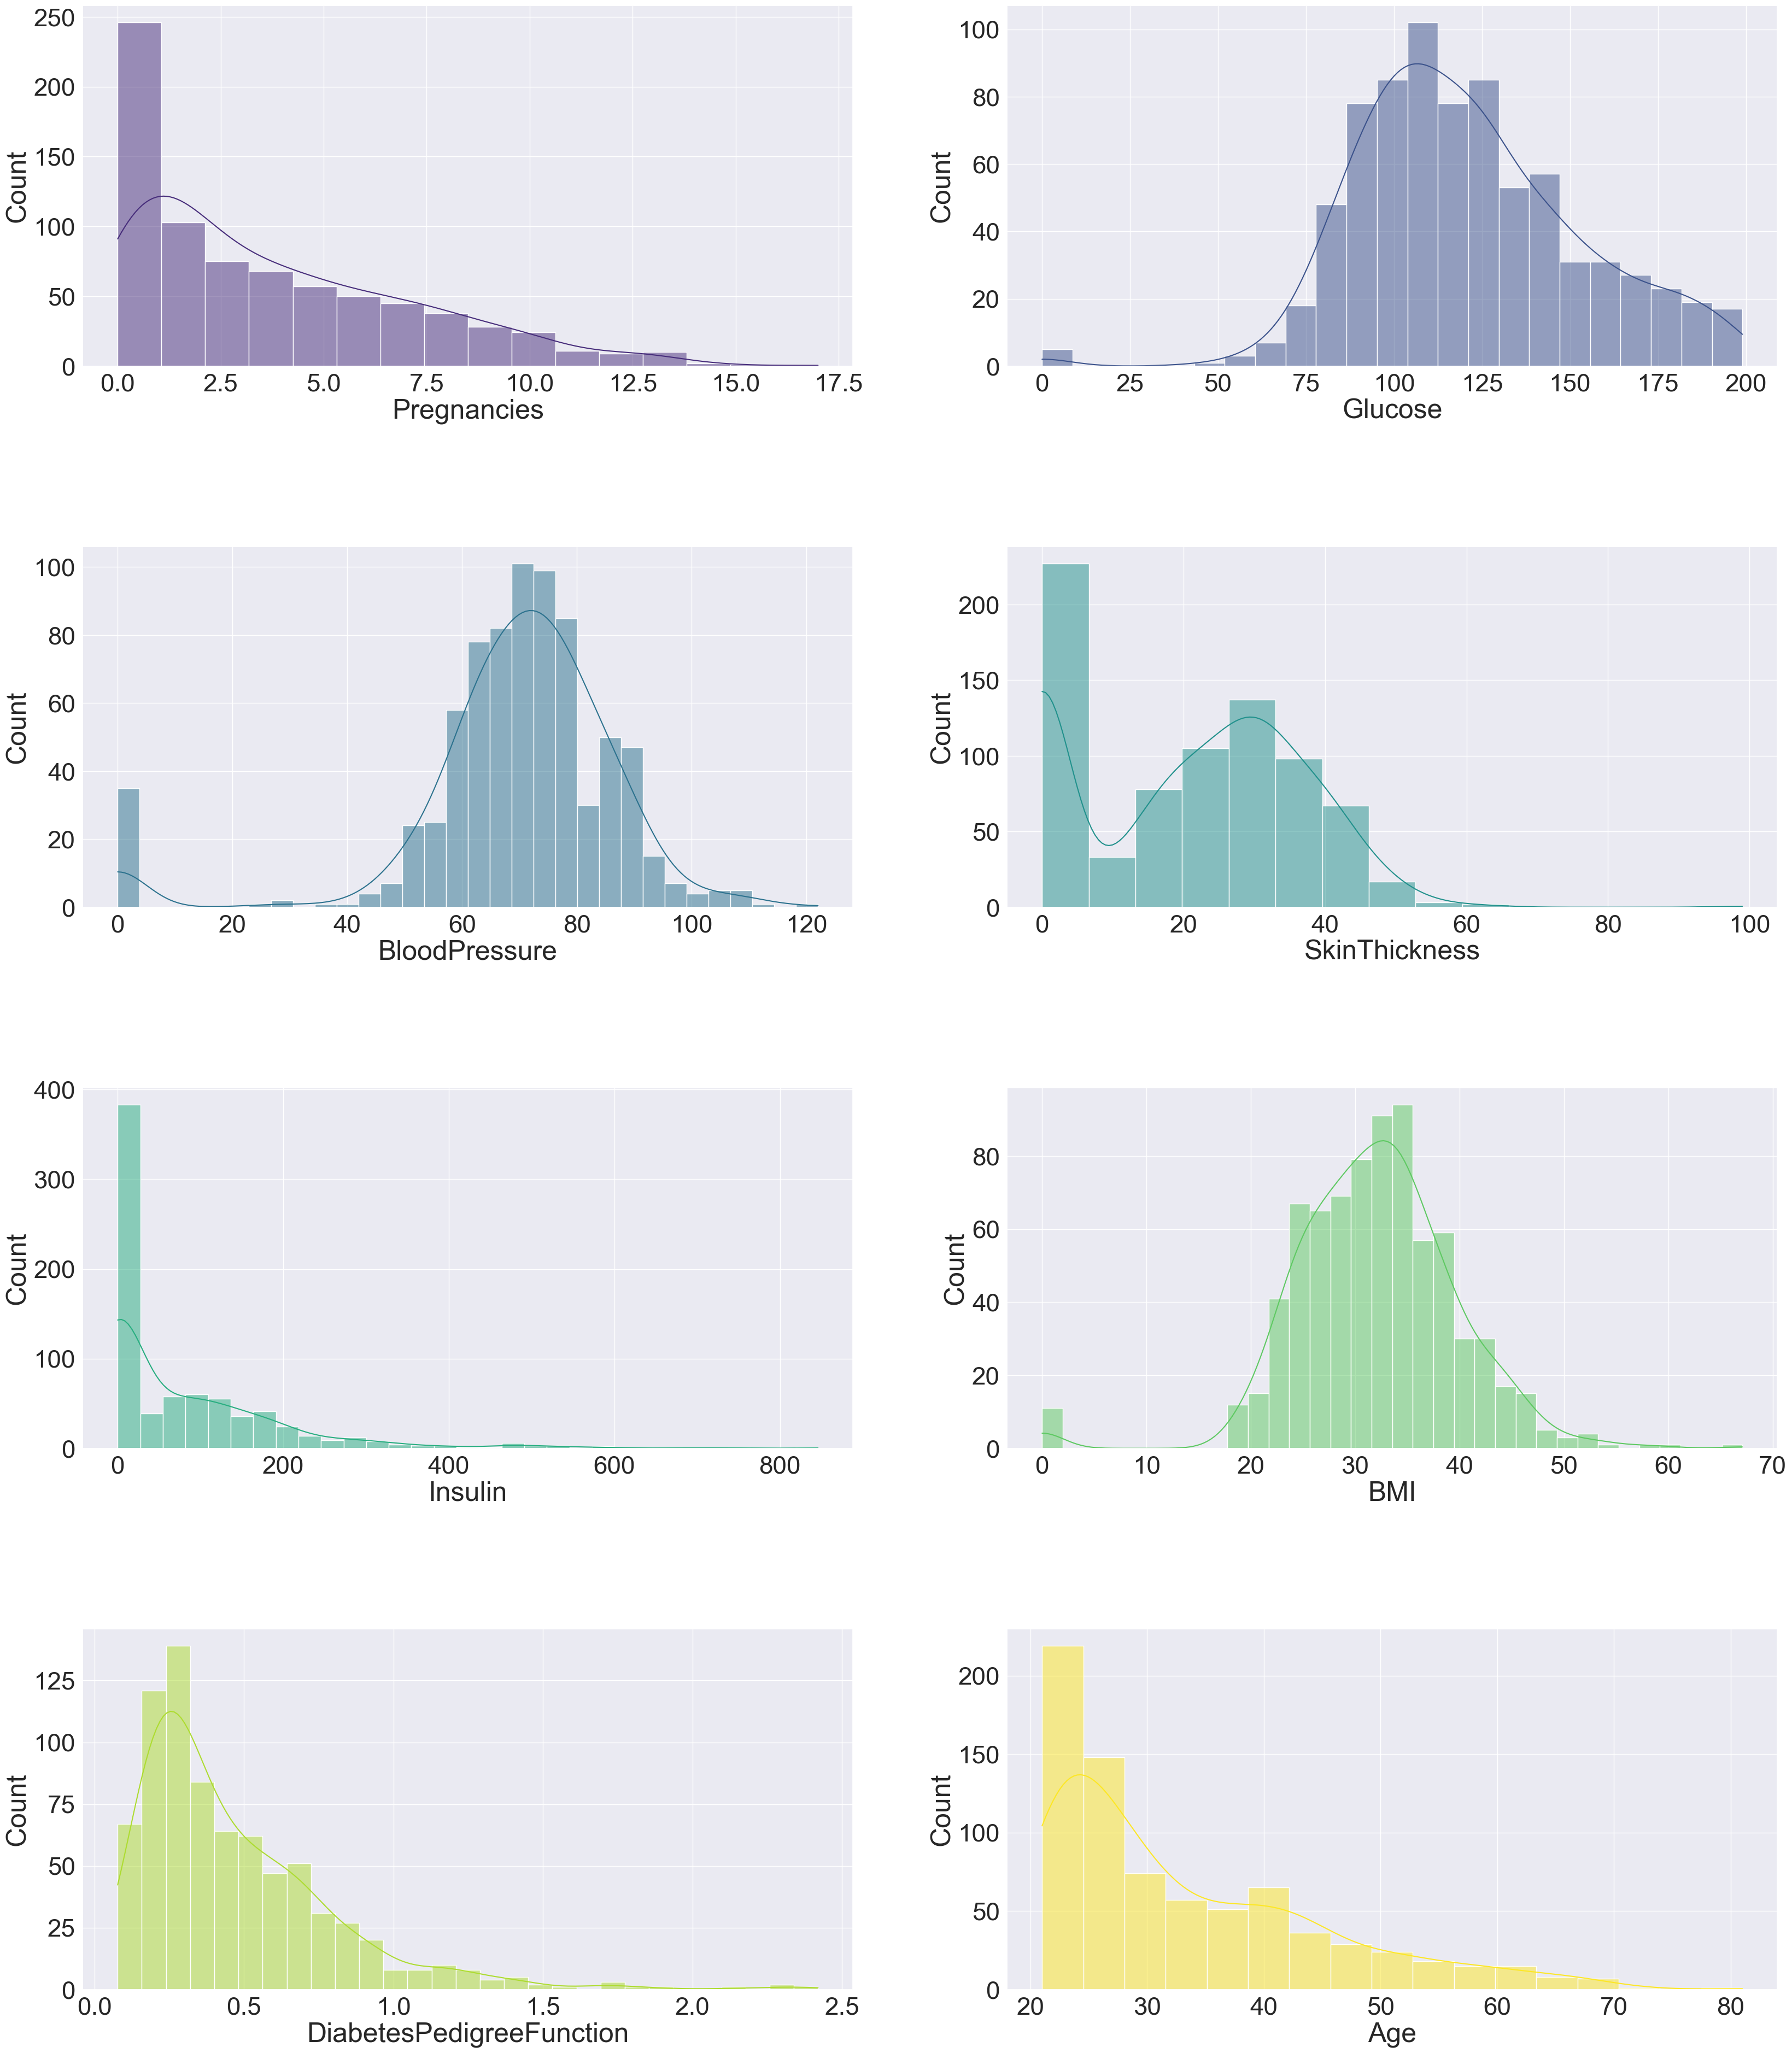

In [10]:
feature_names = data.drop('Outcome', axis=1).columns
sns.set(font_scale = 3)
rcParams['figure.figsize'] = 40,60
plt.subplots_adjust(hspace=0.5)
palette = sns.color_palette("viridis", as_cmap=True)

i = 1

for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=data, x=name, kde=True, color=palette(i/len(feature_names)))
    i = i + 1

Reemplazar los ceros que son nulos por nans

In [11]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']
data[columns] = data[columns].replace(0, np.nan)

En la distribución pudimos observar que había algunos outliers, esto puede hacer que los algoritmos rindan peor asi que quitaremos unos cuantos

In [12]:
def remove_outliers_std(df, col, threshold=4):
    mean = df[col].mean()
    std = df[col].std()

    upper_limit = mean + threshold * std
    
    outliers = df[(df[col] > upper_limit)].index

    df = df.drop(outliers)
    
    return df

for col in ['Insulin', 'Pregnancies', 'SkinThickness']:
    data = remove_outliers_std(data, col)

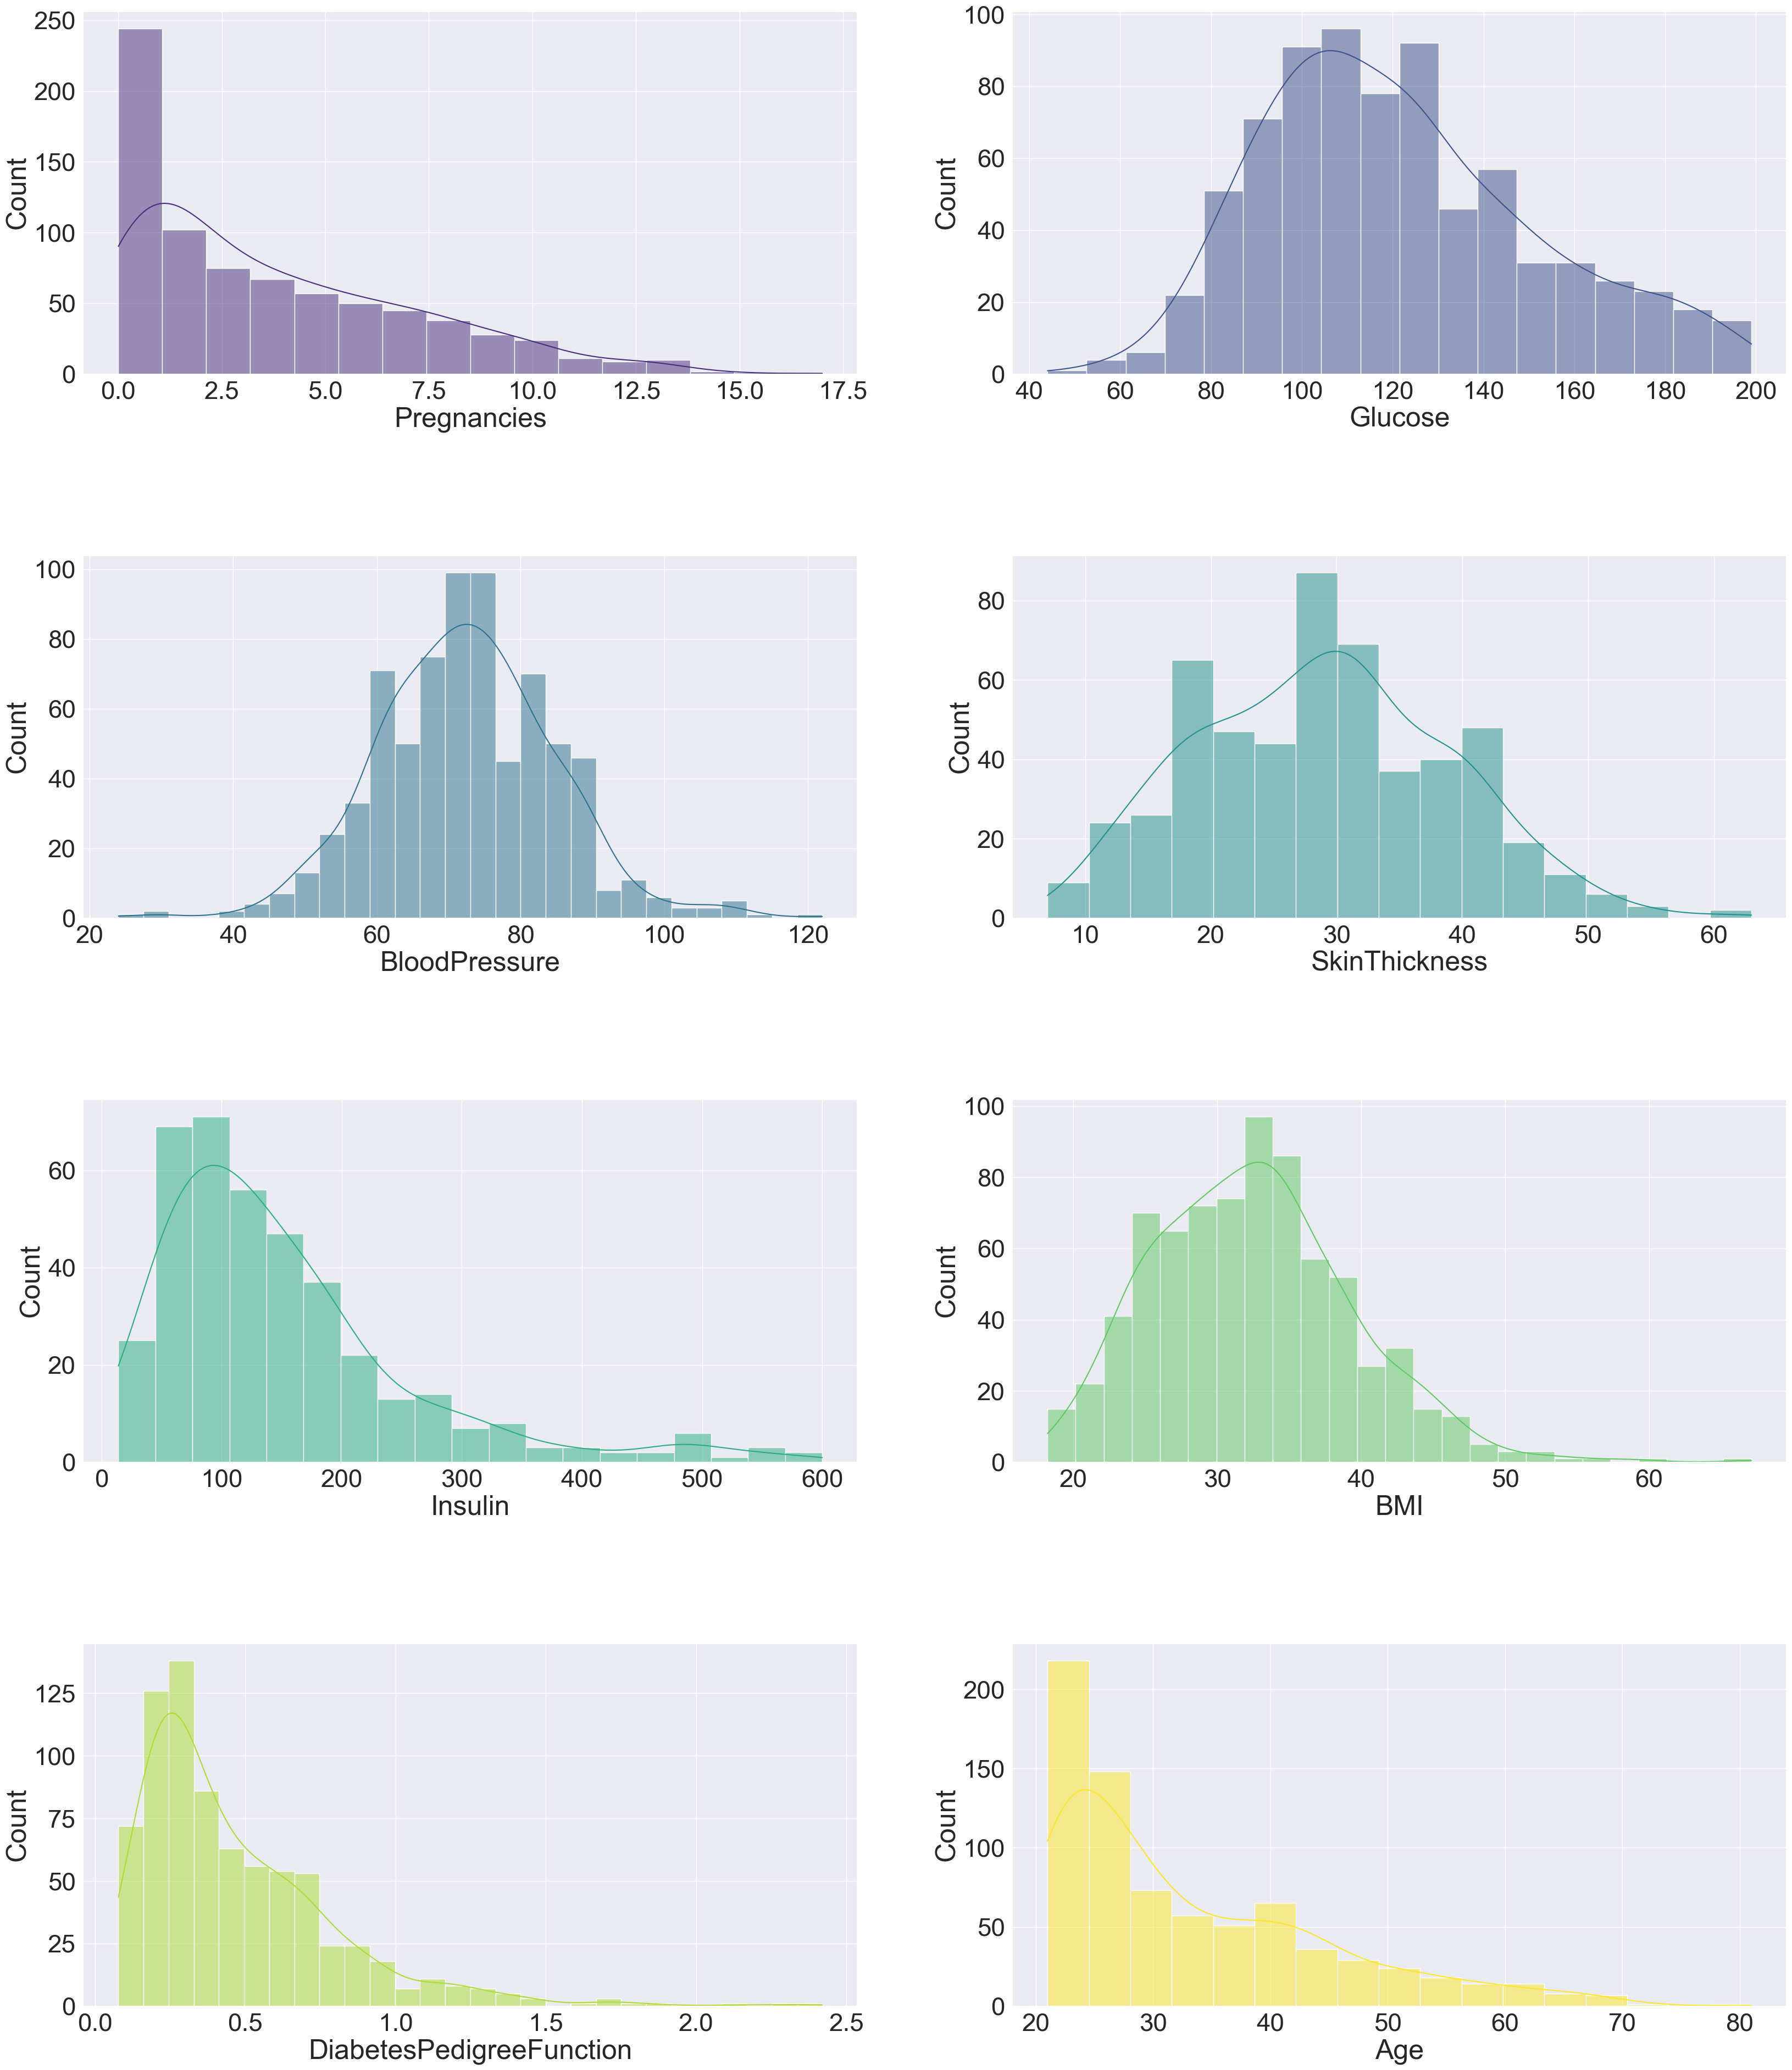

In [13]:
feature_names = data.drop('Outcome', axis=1).columns
sns.set(font_scale = 3)
rcParams['figure.figsize'] = 40,60
plt.subplots_adjust(hspace=0.5)
palette = sns.color_palette("viridis", as_cmap=True)

i = 1

for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=data, x=name, kde=True, color=palette(i/len(feature_names)))
    i = i + 1

Matriz de correlación 

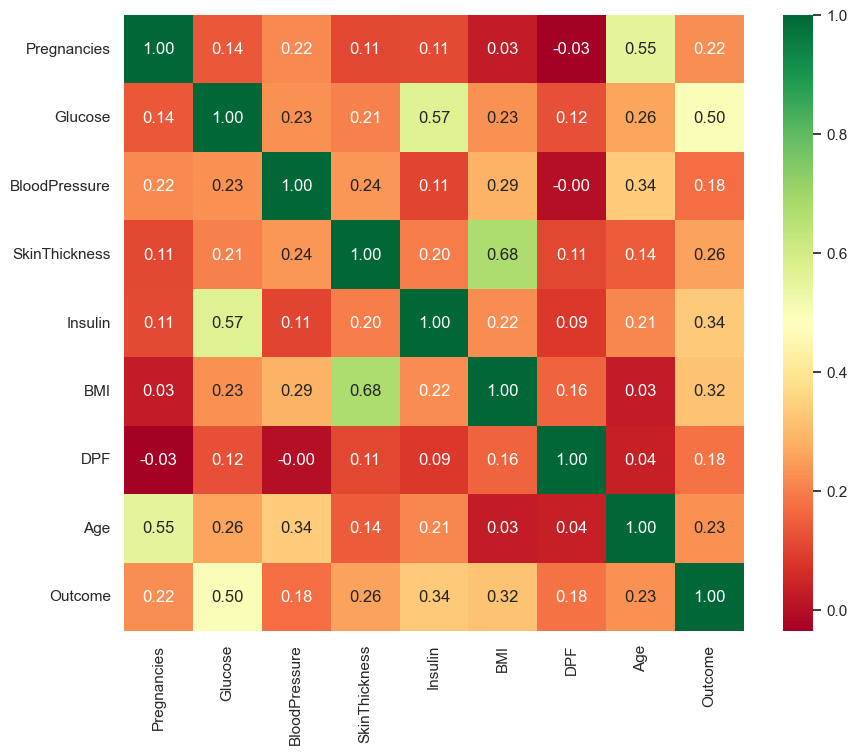

In [14]:
data.rename(columns ={'DiabetesPedigreeFunction' : 'DPF'}, inplace = True)
def matrix_corr(data): 
    correlation = data.corr()
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1)
    sns.heatmap(correlation, annot=True, fmt=".2f", cbar=True, cmap="RdYlGn")

matrix_corr(data)

Pregnancies         Axes(0.125,0.653529;0.227941x0.226471)
Glucose          Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure    Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness       Axes(0.125,0.381765;0.227941x0.226471)
Insulin          Axes(0.398529,0.381765;0.227941x0.226471)
BMI              Axes(0.672059,0.381765;0.227941x0.226471)
DPF                     Axes(0.125,0.11;0.227941x0.226471)
Age                  Axes(0.398529,0.11;0.227941x0.226471)
Outcome              Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

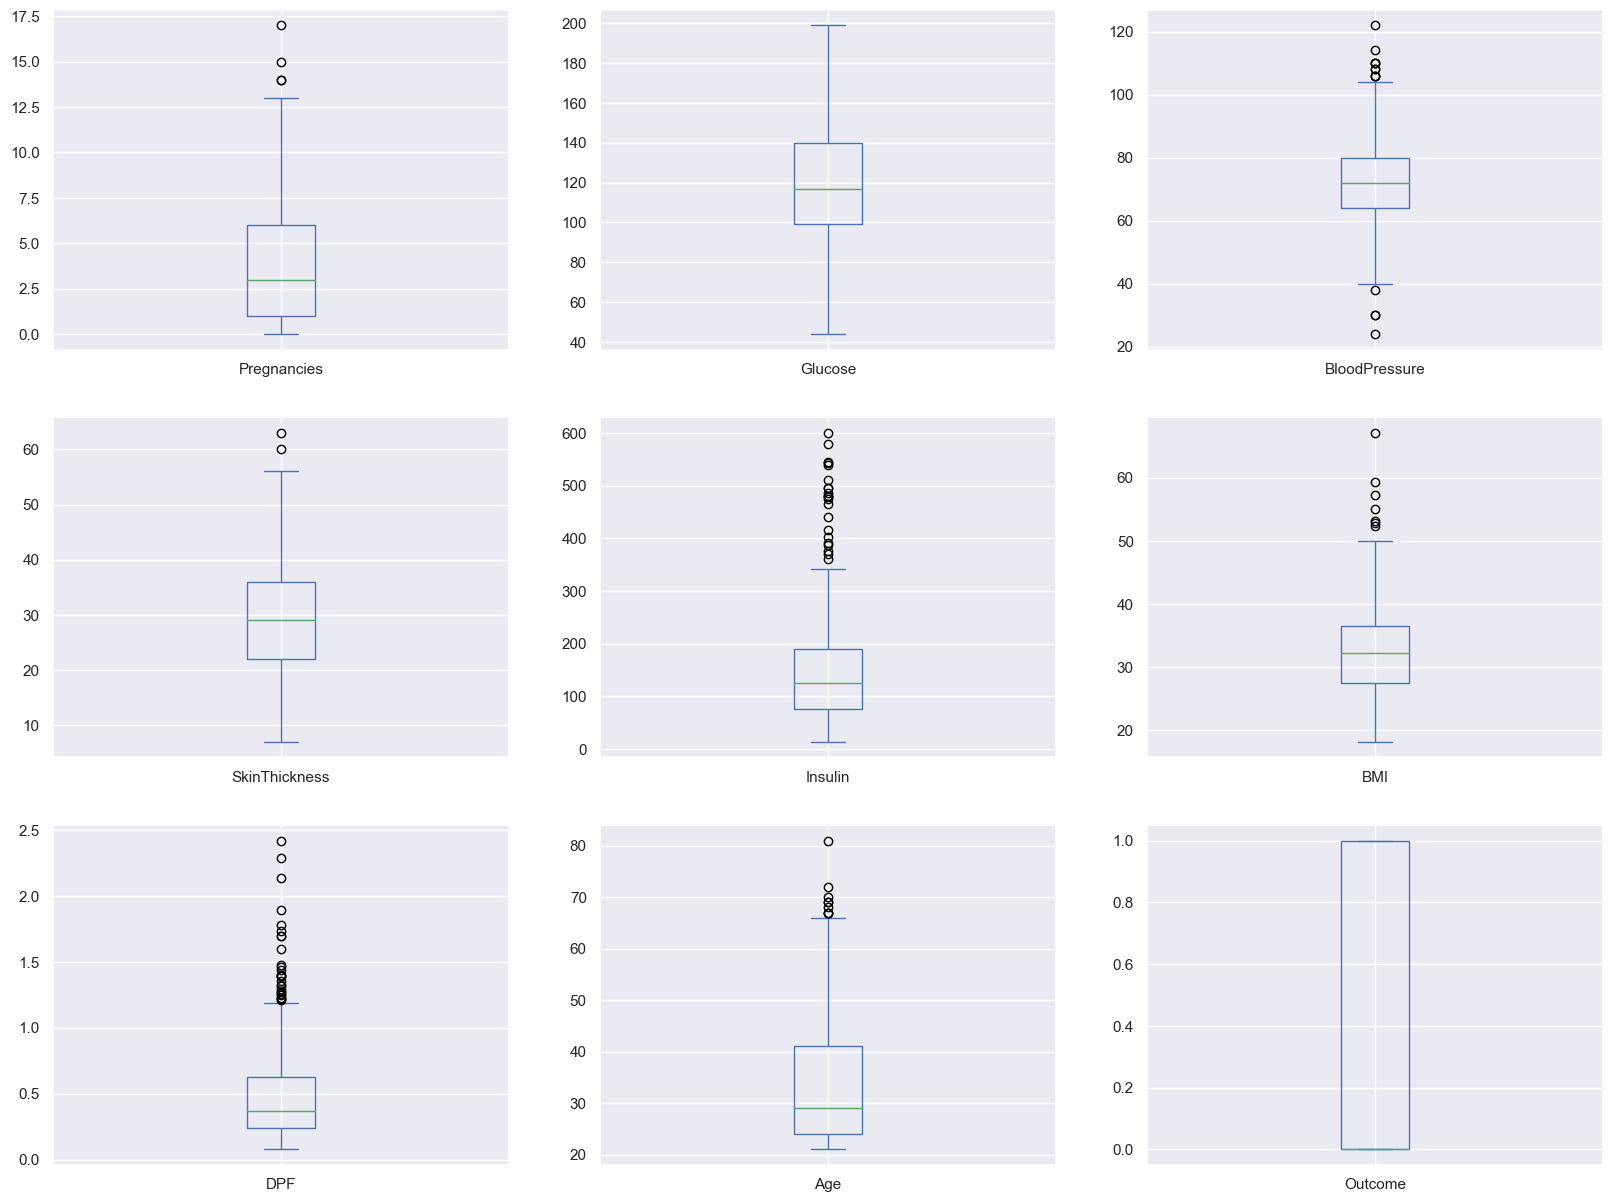

In [15]:
data.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))


Grafica de caja separado por la clase

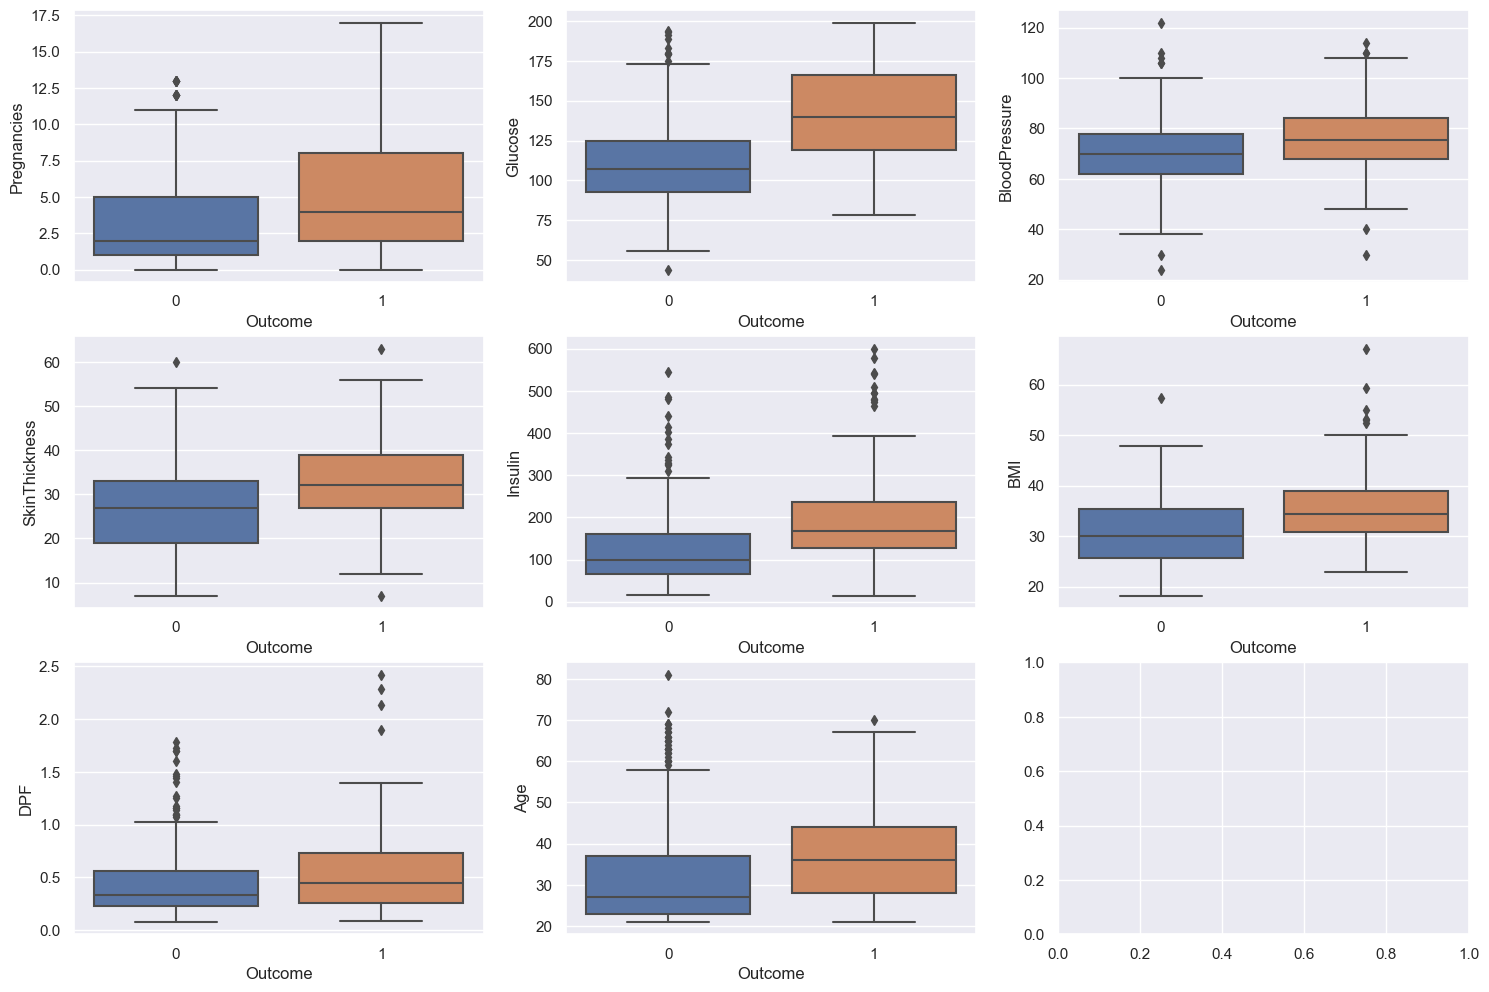

In [16]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']
fig, ax = plt.subplots(round(len(features) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(features) - 1:
        sns.boxplot(y=features[i], x='Outcome', data=data[features], ax=ax)

Al tener muchos datos nulos la opción que tomaremos para reemplazarlos será un imputer ya que quitarlos nos dejaría con muy pocos datos y al tener muy pocas columnas tampoco es una buena idea quitar esas columnas, también se vio en la matriz de correlación que estaban bastante correlacionados con la variable objetivo

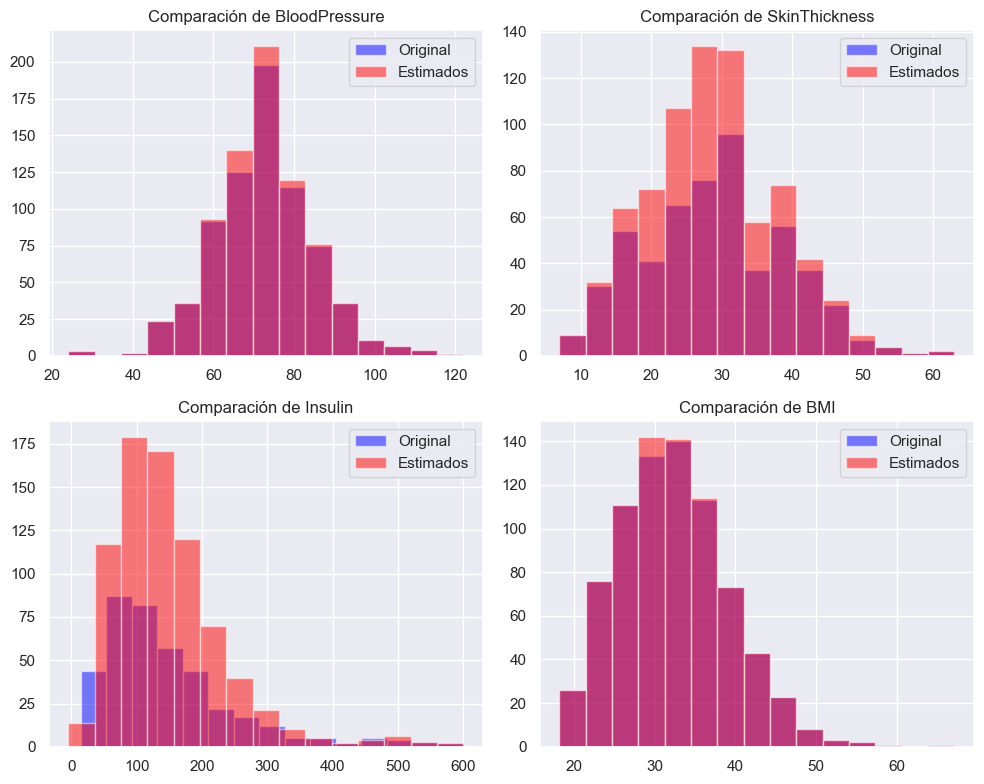

In [17]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

features = ['BloodPressure', 'SkinThickness',
       'Insulin', 'BMI']
imp = IterativeImputer()
data_imp = imp.fit_transform(data)
data_imp = pd.DataFrame(data_imp, columns=data.columns)

fig, axes = plt.subplots(round(len(features) / 2), ncols=2, figsize=(10, 8))

axes = axes.flatten()
for i, col in enumerate(features):
    axes[i].hist(data[col], bins=15, alpha=0.5, label='Original', color='blue')

    axes[i].hist(data_imp[col], bins=15, alpha=0.5, label='Estimados', color='red')

    axes[i].set_title(f'Comparación de {col}')
    axes[i].legend()

plt.tight_layout()
plt.show()

La correlación entre las variables aumenta ligeramente con los datos imputados 

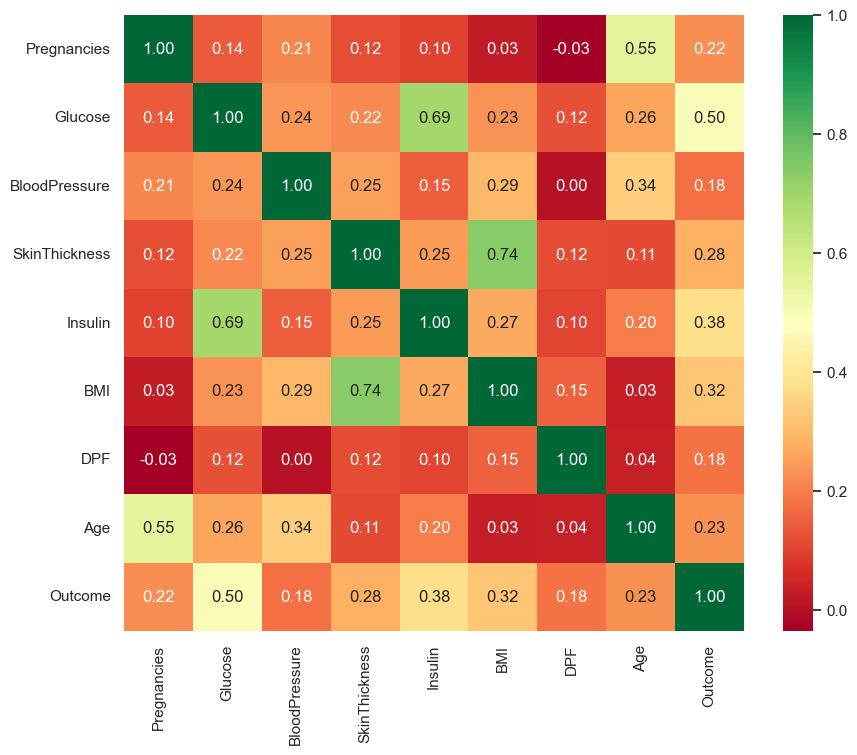

In [18]:
matrix_corr(data_imp)

También rellenaremos los nans con la media para ver la diferencia que hay entre el imputer y usar la media 

In [19]:
data_mean = data.fillna(data.mean())


La correlación en las variables con mas nulos disminuye considerablemente

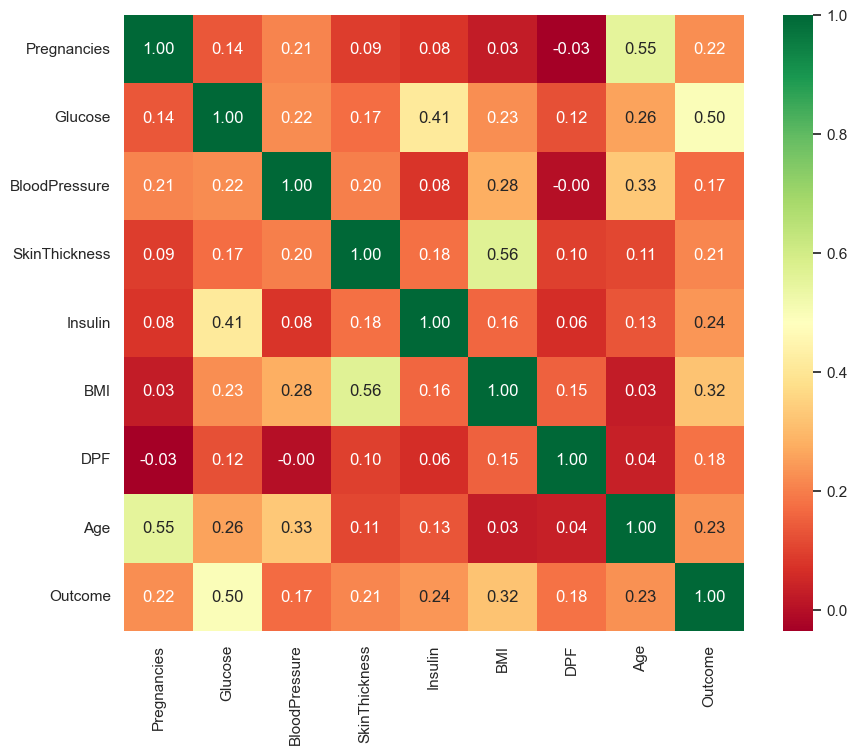

In [20]:
matrix_corr(data_mean)

Ahora usaremos un random forest para ver que importancia le da a cada categoría, lo haremos con datos imputados y con los datos promedio para ver cual es la diferencia y poder elegir que datos utilizar a la hora de hacer nuestro modelo

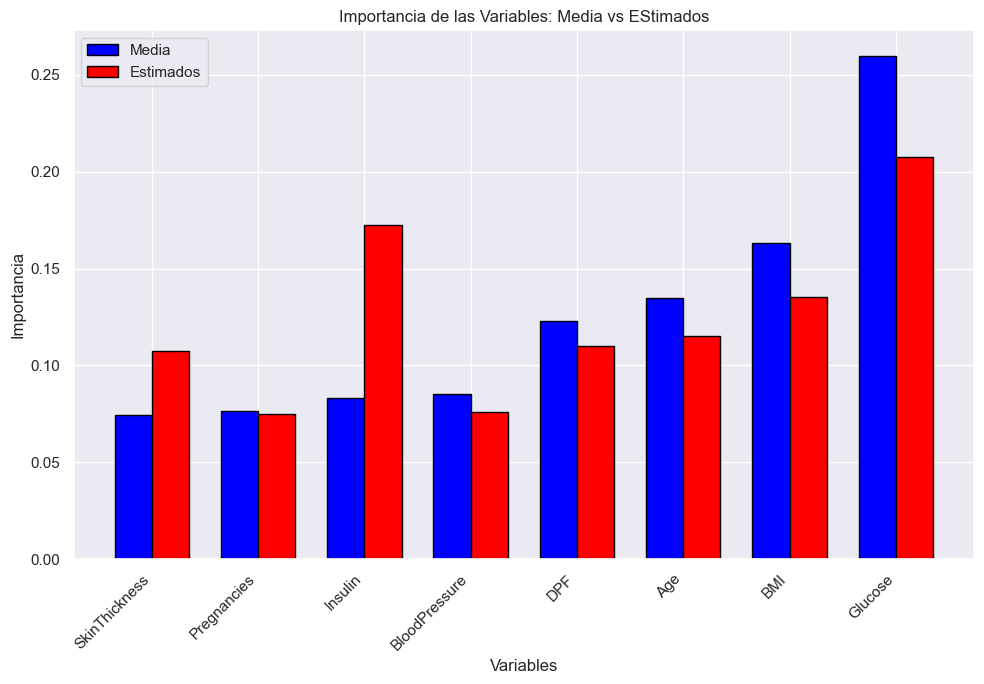

In [21]:
from sklearn.ensemble import RandomForestClassifier

X_imp = data_imp.drop('Outcome', axis=1)
y_imp = data_imp['Outcome']

X_mean = data_mean.drop('Outcome', axis=1)
y_mean = data_mean['Outcome']

model = RandomForestClassifier()
model.fit(X_imp, y_imp)

importances_imp = model.feature_importances_

model = RandomForestClassifier()
model.fit(X_mean, y_mean)

importances_mean = model.feature_importances_

indices = np.argsort(importances_mean)

plt.figure(figsize=(10, 7))

bar_width = 0.35
r1 = np.arange(X_imp.shape[1])
r2 = r1 + bar_width

plt.bar(r1, importances_mean[indices], color='blue', width=bar_width, edgecolor='black', label='Media')

plt.bar(r2, importances_imp[indices], color='red', width=bar_width, edgecolor='black', label='Estimados')

plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Variables: Media vs EStimados')
plt.xticks(r1 + bar_width / 2, X_imp.columns[indices], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
data.to_csv('datos_limpios.csv', index=False)
